# Imports

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.utils import shuffle
from tensorflow.keras import layers, models

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# load images and labels from a directory

In [5]:
# Function to load images and their corresponding labels from the directory
def load_data(directory):
    images = []  # To store image data
    labels = []  # To store corresponding labels
    class_names = sorted(os.listdir(directory))  # Get class names in sorted order
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, file_name)
                img = load_img(img_path, target_size=img_size)  # Load image and resize to specified size
                img = img_to_array(img)  # Convert image to array format
                images.append(img)  # Append image to the list
                labels.append(label)  # Append label (numeric class index) to the list
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, class_names

# Define directories for training and testing datasets
train_dir = 'C:\\Users\\dovy4\\Desktop\\1000'
test_dir = 'C:\\Users\\dovy4\\Desktop\\test_100'

# Define image size (32x32 pixels)
img_size = (32, 32)

# Load and shuffle training data
train_images, train_labels, class_names = load_data(train_dir)
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

# Load and shuffle test data
test_images, test_labels, _ = load_data(test_dir)
test_images, test_labels = shuffle(test_images, test_labels, random_state=42)

# Normalize the data

In [6]:
# Normalize the image data to range [0, 1] by dividing by 255
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode labels

In [7]:
# Convert labels to one-hot encoding format
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=len(class_names))
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=len(class_names))

# Define the CNN model for 32x32 images

for this part more layers were initially added however this caused overfitting in the training process and a more simplified version actually gave us better results.

In [8]:
# Define the CNN model architecture
model = models.Sequential([
    # First convolutional layer with 32 filters, each of size 3x3
    # Activation function: ReLU (Rectified Linear Unit)
    # Input shape specified for the first layer: 32x32 image with 3 color channels (RGB)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    
    # MaxPooling layer to reduce the spatial dimensions (downsampling)
    # Pool size of 2x2, reduces the size of the feature maps by half
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional layer with 64 filters, each of size 3x3
    # Activation function: ReLU
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    
    # MaxPooling layer to further reduce the spatial dimensions
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional layer with 128 filters, each of size 3x3
    # Activation function: ReLU
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    
    # MaxPooling layer to reduce spatial dimensions for the last time
    layers.MaxPooling2D((2, 2)),
    
    # Flatten layer to convert 2D matrices into a 1D vector (required before feeding into fully connected layers)
    layers.Flatten(),
    
    # Fully connected (Dense) layer with 256 units
    # Activation function: ReLU
    layers.Dense(256, activation='relu'),
    
    # Dropout layer to prevent overfitting by randomly setting a fraction of input units to 0 during training
    # Dropout rate: 50% (0.5)
    layers.Dropout(0.5),
    
    # Output layer with units equal to the number of classes (class_names)
    # Activation function: Softmax (for multi-class classification)
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model with Adam optimizer, categorical crossentropy loss function, and accuracy metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\dovy4\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Train the model

In [9]:
# loss: how well the model’s predictions match the actual data

# Define a callback to reduce learning rate when the validation loss has stopped improving
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5)

# Train the model using the training data, with 20 epochs and a validation split of 20%
# The reduce_lr callback is used to adjust the learning rate during training
history = model.fit(
    train_images, train_labels,
    epochs=20,
    validation_split=0.2,
    batch_size=32,
    callbacks=[reduce_lr]
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.1984 - loss: 2.1255 - val_accuracy: 0.3760 - val_loss: 1.6715 - learning_rate: 0.0010
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.3817 - loss: 1.6604 - val_accuracy: 0.4470 - val_loss: 1.5049 - learning_rate: 0.0010
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4546 - loss: 1.4704 - val_accuracy: 0.5085 - val_loss: 1.3444 - learning_rate: 0.0010
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5140 - loss: 1.3267 - val_accuracy: 0.5160 - val_loss: 1.2928 - learning_rate: 0.0010
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5516 - loss: 1.2120 - val_accuracy: 0.5500 - val_loss: 1.2613 - learning_rate: 0.0010
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6082 - loss: 1.0952 - val_accuracy: 0.5930 - val_loss: 1.1552 - learning_rate: 0.0010
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6414 - loss: 1.

# Evaluate the model

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6765 - loss: 1.0698
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


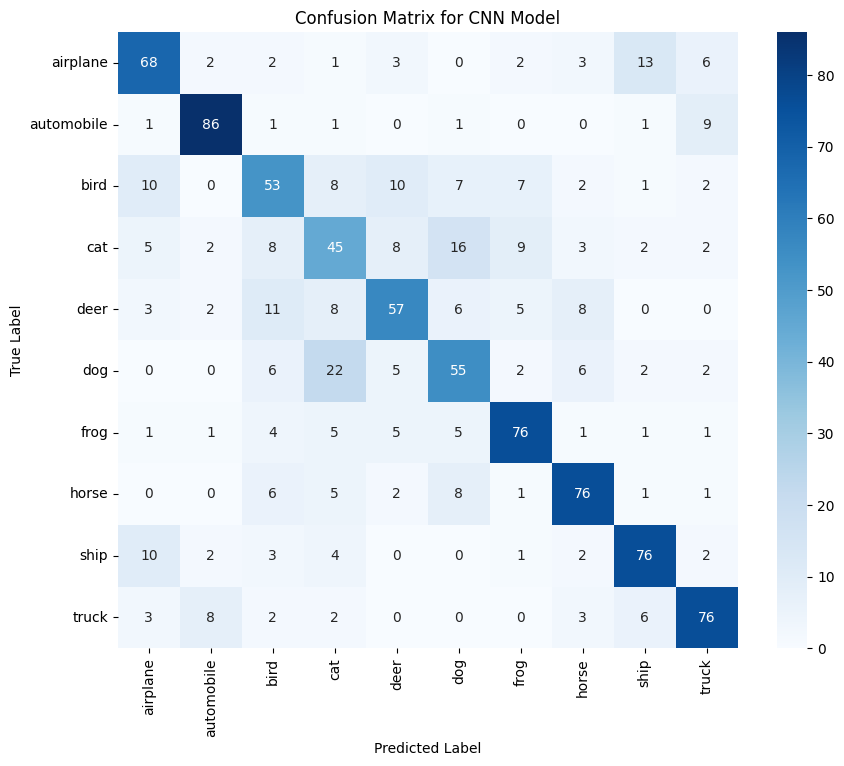

Test accuracy: 0.6679999828338623


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)



# Predict on test data
test_predictions = model.predict(test_images)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_labels_classes = np.argmax(test_labels, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels_classes, test_predictions_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CNN Model')
plt.show()




print(f'Test accuracy: {test_acc}')

# Save the model

In [ ]:
model.save('cnn_model.h5')